In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [6]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.drop(['RowNumber','Surname'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [12]:
def visualization(x,y,xlabel):
  plt.figure(figsize=(10,5))
  plt.hist([x,y],color=['red','green'],label=['Exited','Not Exited'],alpha=0.7)
  plt.xlabel(xlabel,fontsize=20)
  plt.ylabel('No of customers',fontsize=20)
  plt.title(f"Customer churn visualization based on {xlabel}",fontsize=20)
  plt.legend()
  plt.show()

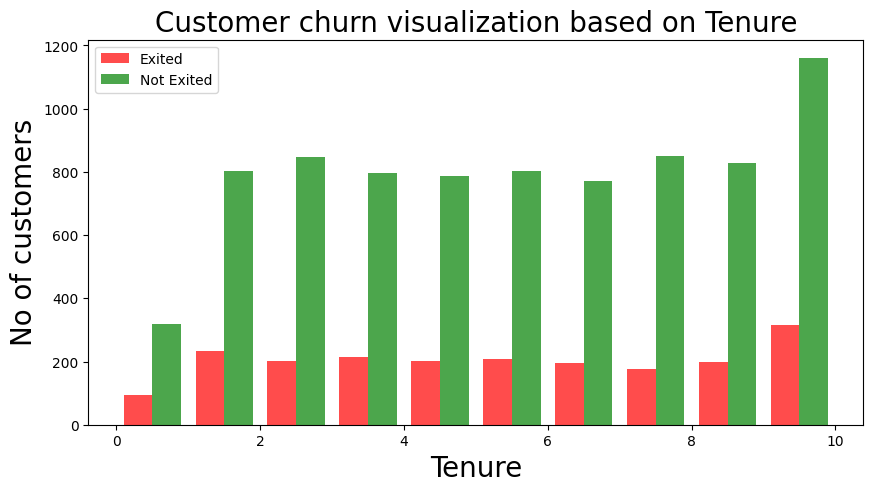

In [13]:
df_churn_exited=df[df['Exited']==1]['Tenure']
df_churn_not_exited=df[df['Exited']==0]['Tenure']
visualization(df_churn_exited,df_churn_not_exited,"Tenure")

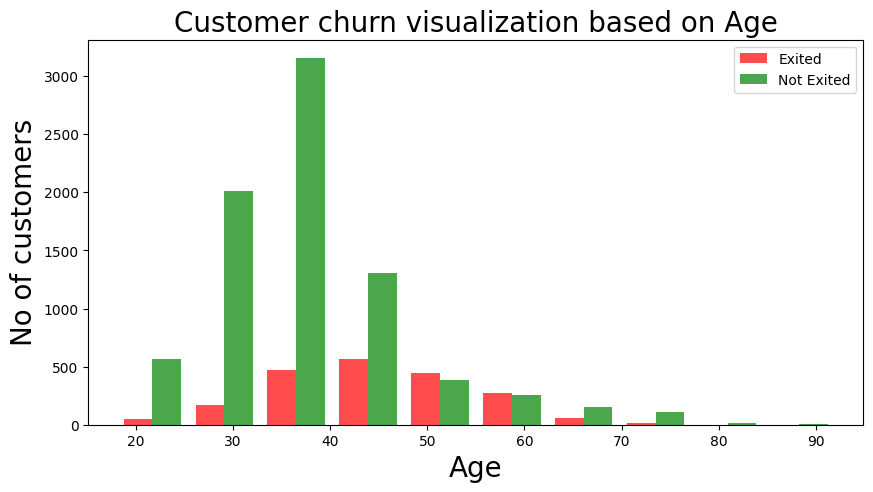

In [14]:
# Visualize churn by age
df_churn_exited2 = df[df['Exited'] == 1]['Age']
df_churn_not_exited2 = df[df['Exited'] == 0]['Age']
visualization(df_churn_exited2, df_churn_not_exited2, "Age")


In [16]:
states=pd.get_dummies(df['Geography'])
states.head()

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True


In [17]:
gender=pd.get_dummies(df['Gender'])
gender.head()

,Female,Male
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [18]:
df=pd.concat([df,states,gender],axis=1)

In [22]:
df.drop(['Geography','Gender'],axis=1,inplace=True)

In [23]:
df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [25]:
X=df.drop(['Exited'],axis=1)
y=df['Exited']

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [29]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [31]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [36]:
classifier=Sequential()

classifier.add(Dense(activation='relu',input_dim=14,units=6,kernel_initializer='uniform'))
classifier.add(Dense(activation='relu', units=6, kernel_initializer='uniform'))
classifier.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
classifier.fit(X_train,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8013 - loss: 0.5792 - val_accuracy: 0.7987 - val_loss: 0.4288
Epoch 2/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7982 - loss: 0.4353 - val_accuracy: 0.7987 - val_loss: 0.4210
Epoch 3/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7915 - loss: 0.4309 - val_accuracy: 0.7987 - val_loss: 0.4163
Epoch 4/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7930 - loss: 0.4262 - val_accuracy: 0.8269 - val_loss: 0.4136
Epoch 5/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8155 - loss: 0.4318 - val_accuracy: 0.8319 - val_loss: 0.4127
Epoch 6/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8285 - loss: 0.4189 - val_accuracy: 0.8338 - val_loss: 0.4108
Epoch 7/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8257 - loss: 0.4256 - val_accuracy: 0.8363 - val_loss: 0.4096
Epoch 8/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8317 - loss: 0.4037 - val_accuracy: 0.

In [38]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")


cnf = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{cnf}")

print(classification_report(y_test, y_pred))

Accuracy:0.841
Confusion Matrix: 
[[1555   52]
 [ 266  127]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1607
           1       0.71      0.32      0.44       393

    accuracy                           0.84      2000
   macro avg       0.78      0.65      0.68      2000
weighted avg       0.83      0.84      0.82      2000

